# Upper Confidence Bound

[A very great 4 minutes video on confidence interval](https://www.youtube.com/watch?v=tFWsuO9f74o)

### Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


### Implementing the Upper Confidence Bound

In [4]:
N = len(dataset)
d = len(dataset.iloc[0].values)
ads_selected = []

nb_of_sel = [0] * d # Number of Selections
sum_of_rwd = [0] * d # Sums of reward
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if nb_of_sel[i] > 0:
            average_reward = sum_of_rwd[i] / nb_of_sel[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / nb_of_sel[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    nb_of_sel[ad] += 1
    reward = dataset.values[n, ad]
    sum_of_rwd[ad] += reward
    total_reward = total_reward + reward

In [5]:
total_reward

2178

In [6]:
# Best ad having highest convergent rate can be found by checking last few data of ads_selected
ads_selected[9980:10000]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

### Visualizing the results

Text(0,0.5,'Number of time each Ad was selected')

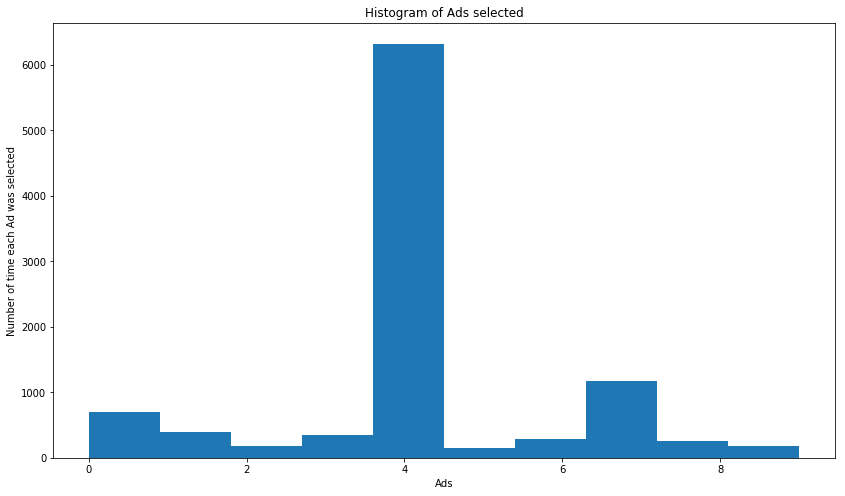

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of time each Ad was selected')